# HW5

### Author: Joseph Wong

## Import Packages and the Data Set

In [57]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

In [58]:
user_usage=pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/user_usage.csv')
user_usage.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
5,71.59,79.26,1557.33,22793
6,71.59,79.26,519.12,22794
7,71.59,79.26,519.12,22795
8,30.92,22.77,3114.67,22799
9,69.80,14.70,25955.55,22801


In [59]:
user_device=pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/user_device.csv')
user_device.head(10)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
5,22787,12921,android,4.3,GT-I9505,1
6,22788,28714,android,6.0,SM-G930F,1
7,22789,28714,android,6.0,SM-G930F,1
8,22790,29592,android,5.1,D2303,1
9,22791,28775,ios,10.2,"iPhone6,2",3


In [60]:
device=pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/android_devices.csv')
device.head(10)

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


## Merging the Data Sets

In [63]:
user_usage.shape

(240, 4)

In [62]:
user_device.shape

(272, 6)

In [61]:
device.shape

(14546, 4)

The data sets each have a different number of observations and variables. For the merged data set, we want to keep the observations from 'user_device' because those represent real users.

In [76]:
common_device = set(user_device['device']).intersection(set(device['Device']))
print("common_device: ", len(common_device))
common_model = set(user_device['device']).intersection(set(device['Model']))
print("common_device: ", len(common_model))

common_device:  9
common_device:  53


In [81]:
device['Model'].isna().sum()

np.int64(0)

The 'Model' column in the 'device' dataframe has more matches with values in the 'device' column of the 'user_device' dataframe. It also does not have any NaNs. So, we will use these columns to merge the two dataframes.

In [77]:
# merge device to user_device (left because we only care about observations that represent a user)
df_temp = pd.merge(user_device,device,left_on='device',right_on='Model',how='left')
# merge user_usage to new df (left because we only care about observations that represent a user)
df_temp = pd.merge(df_temp,user_usage,on='use_id',how='left')
df_temp

,use_id,user_id,platform,platform_version,device,use_type_id,Retail Branding,Marketing Name,Device,Model,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22782,26980,ios,10.2,"iPhone7,2",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22783,29628,android,6.0,Nexus 5,3,LGE,Nexus 5,hammerhead,Nexus 5,NaN,NaN,NaN
2,22784,28473,android,5.1,SM-G903F,1,Samsung,Galaxy S5 Neo,s5neolte,SM-G903F,NaN,NaN,NaN
3,22785,15200,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22786,28239,android,6.0,ONE E1003,1,OnePlus,OnePlus,OnePlus,ONE E1003,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,23050,29726,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,23051,29726,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,23052,29727,ios,10.1,"iPhone8,4",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,23053,20257,android,5.1,Vodafone Smart ultra 6,1,Vodafone,Vodafone Smart ultra 6,P839V55,Vodafone Smart ultra 6,42.75,46.83,5191.12


After merging, there are some observations with multiple NaNs. This was caused by the merge index not existing in either the 'device' or 'user_usage' dataframe.

In [99]:
df_temp.drop('Model', axis=1, inplace=True)

We will drop the column 'Model' because it contains the same values as the 'device' column, except it is missing some values.

In [102]:
# rename cols to be consistent style
df_temp.rename(columns={'Retail Branding':'retail_branding','Marketing Name':'marketing_name','Device':'device_code'}, inplace=True)
df_temp

,use_id,user_id,platform,platform_version,device,use_type_id,retail_branding,marketing_name,device_code,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22782,26980,ios,10.2,"iPhone7,2",2,NaN,NaN,NaN,NaN,NaN,NaN
1,22783,29628,android,6.0,Nexus 5,3,LGE,Nexus 5,hammerhead,NaN,NaN,NaN
2,22784,28473,android,5.1,SM-G903F,1,Samsung,Galaxy S5 Neo,s5neolte,NaN,NaN,NaN
3,22785,15200,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN,NaN,NaN,NaN
4,22786,28239,android,6.0,ONE E1003,1,OnePlus,OnePlus,OnePlus,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
325,23050,29726,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN,NaN,NaN,NaN
326,23051,29726,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN,NaN,NaN,NaN
327,23052,29727,ios,10.1,"iPhone8,4",3,NaN,NaN,NaN,NaN,NaN,NaN
328,23053,20257,android,5.1,Vodafone Smart ultra 6,1,Vodafone,Vodafone Smart ultra 6,P839V55,42.75,46.83,5191.12


In [107]:
# create copy of df_temp to use for analysis
df = df_temp.copy()

## Does the platform being used impact the number of monthly mb used?

In [146]:
df['monthly_mb'][df['platform']=='ios'].notna().sum()

np.int64(2)

There are only two observations that are not NaNs in the 'monthly_mb' column that have 'ios' as their 'platform'. With such a small sample size, we cannot draw a reasonable conclusion to answer whether platform impacts the number of monthly mb used. Therefore, we would need more data to answer the question.

## Do users using Samsung devices use more call minutes than those using HTC devices?

In [156]:
df['retail_branding'][df['outgoing_mins_per_month'].notna()].value_counts()

retail_branding
Samsung     108
HTC          44
Sony         16
Motorola     16
OnePlus       6
Huawei        3
LGE           2
Lenovo        2
Lava          2
Vodafone      1
ZTE           1
Name: count, dtype: int64

Samsung and HTC devices have the greatest number of observations while having values for 'outgoing_mins_per_month' (108 and 44 respectively). So, the sample size is adequate for analysis.

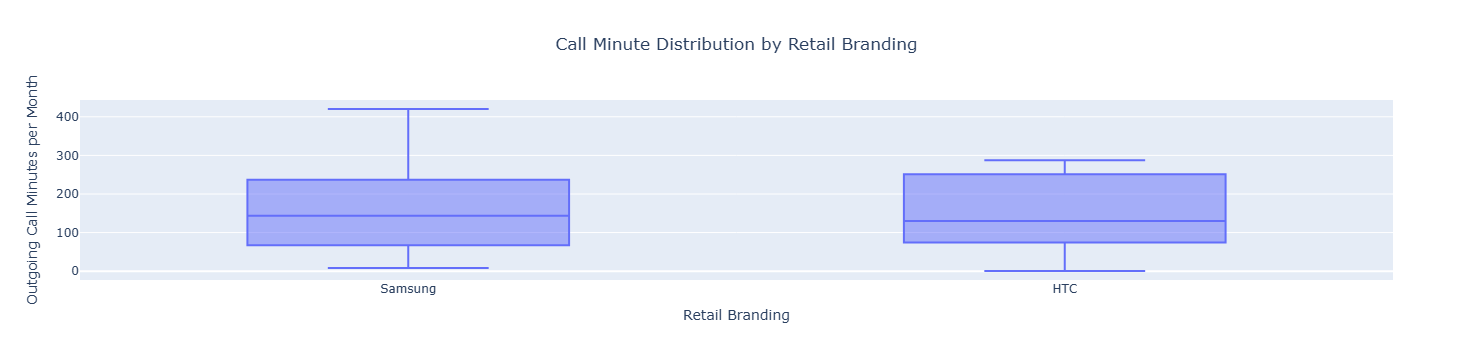

In [186]:
# mask to only have Samsung and HTC be visible, cap 'outgoing_mins_per_month' to ignore large outliers
mask = ((df['retail_branding']=='Samsung') | (df['retail_branding']=='HTC')) & (df['outgoing_mins_per_month']<500)
fig = px.box(df[mask],
            x='retail_branding',
            y='outgoing_mins_per_month',
            title="Call Minute Distribution by Retail Branding",
            width=750)
fig.update_layout(title_x=0.5,
                  xaxis_title="Retail Branding",
                  yaxis_title="Outgoing Call Minutes per Month")
fig.show()

It appears that users using Samsung devices use slightly fewer call minutes on average than those using HTC devices. The median call minutes for Samsung users is 143.81 while for HTC users it is 129.85. However, the interquartile range for HTC users has greater values compared to Samsung users. This suggests HTC users typically have ongoing call minutes greater than Samsung users. These findings should be taken with caution, because their spreads are fairly similar and Samsung users have a greater upper fence, which could suggest a few Samsung users use more call minutes than HTC users.

## Is there a correlation between outgoing call minutes and outgoing sms?

In [182]:
my_cols = ['outgoing_mins_per_month','outgoing_sms_per_month']
df[my_cols][(df['outgoing_mins_per_month'].notna()) & (df['outgoing_sms_per_month'].notna())]

,outgoing_mins_per_month,outgoing_sms_per_month
6,21.97,4.82
7,1710.08,136.88
8,1710.08,136.88
9,94.46,35.17
11,71.59,79.26
...,...,...
320,106.65,82.13
321,106.65,82.13
324,344.53,20.53
328,42.75,46.83


There are 211 observations that contain values for both 'outgoing_mins_per_month' and 'outgoing_sms_per_month'. So, this is an adequate sample size.

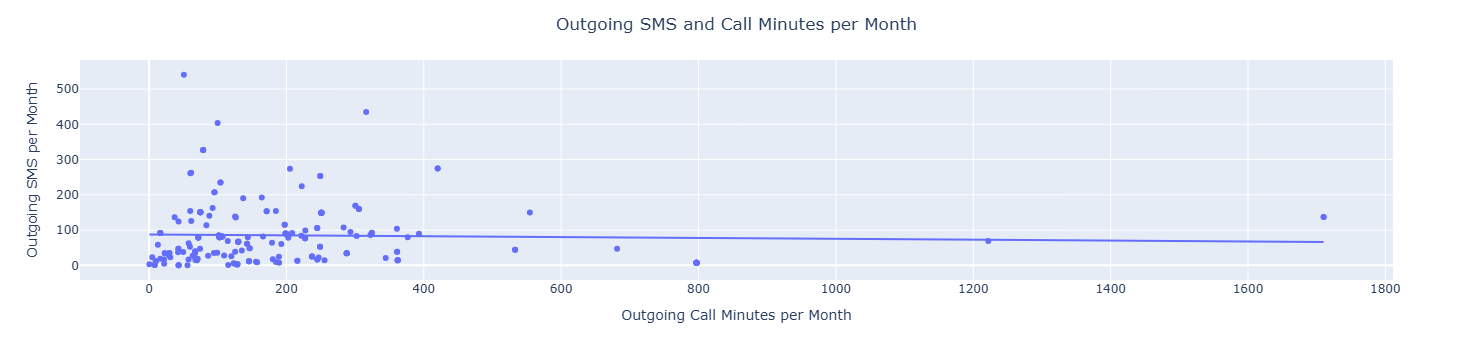

In [188]:
fig = px.scatter(df,
                x='outgoing_mins_per_month',
                y='outgoing_sms_per_month',
                trendline="ols")
fig.update_layout(title = "Outgoing SMS and Call Minutes per Month",
                  title_x = 0.5,
                  xaxis_title = "Outgoing Call Minutes per Month",
                  yaxis_title = "Outgoing SMS per Month")
fig.show()

From the graph, there does not appear to be an obvious correlation between outgoing call minutes per month and outgoing sms per month. The trendline has a very slight negative slope, which suggests an increase in outgoing call minutes does not have a large correlation with a change in outgoing sms. The data appears to be most frequent around call minutes 0 to 400 and sms 0 to 200. However, there is no apparent pattern or trend between outgoing call minutes per month and outgoing sms per month.